In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем данные
titanic = pd.read_csv("titanic.csv")

In [3]:
# Общая сводка
print(f"Размер набора данных: {titanic.shape}")
print("\nПервые строки таблицы:")
print(titanic.head())
print("\nКоличество пропусков по столбцам:")
print(titanic.isna().sum())

Размер набора данных: (891, 12)

Первые строки таблицы:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  

### Гипотеза: погибших больше, чем выживших

Ожидается, что число пассажиров, не сумевших спастись, превысит число выживших, потому что спасательных средств было заметно меньше, чем людей на борту

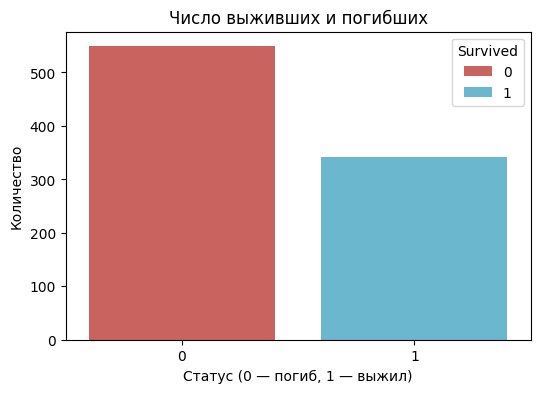

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x="Survived", hue="Survived", palette=["#d9534f", "#5bc0de"])
plt.title("Число выживших и погибших")
plt.xlabel("Статус (0 — погиб, 1 — выжил)")
plt.ylabel("Количество")
plt.show()


Вывод: предположение подтвердилось: в выборке видно, что жертв катастрофы значительно больше, чем спасшихся

### Гипотеза: женщины выживали чаще мужчин

Предполагается, что женщины имели лучшие шансы на спасение, поскольку экипаж придерживался принципа женщины и дети первыми

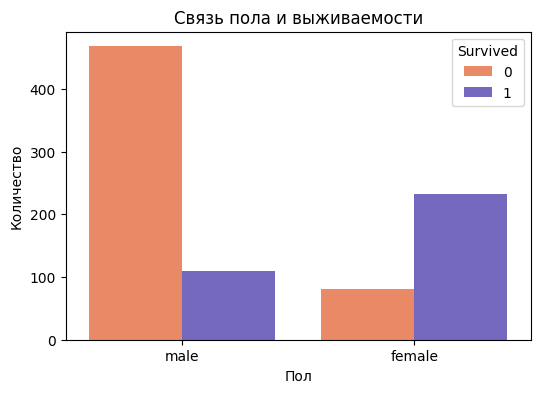

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=titanic,
    x="Sex",
    hue="Survived",
    palette={0: "#ff7f50", 1: "#6a5acd"}  
)
plt.title("Связь пола и выживаемости")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()


Вывод: Женщины действительно демонстрируют более высокий процент выживших по сравнению с мужчинами

### Гипотеза: пассажиры 1 класса выживали чаще

Можно предположить, что у пассажиров первого класса был более удобный доступ к шлюпкам, поэтому их вероятность выжить должна быть выше

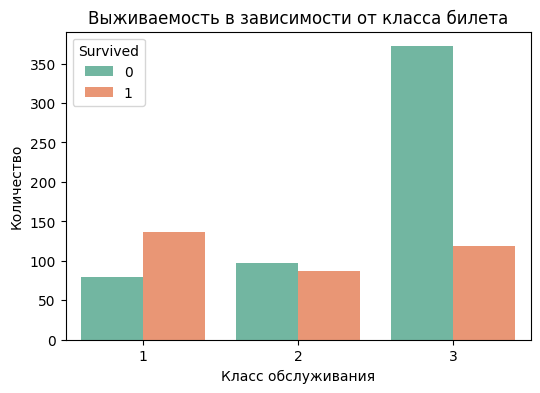

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x="Pclass", hue="Survived",
              palette="Set2")
plt.title("Выживаемость в зависимости от класса билета")
plt.xlabel("Класс обслуживания")
plt.ylabel("Количество")
plt.show()


Вывод: данные подтверждают, что статус билета играл значимую роль — путешествовавшие первым классом спасались гораздо чаще

### Гипотеза: дети выживали чаще

Можно предположить, что детям уделяли повышенное внимание при эвакуации, что повышало их шансы на спасение

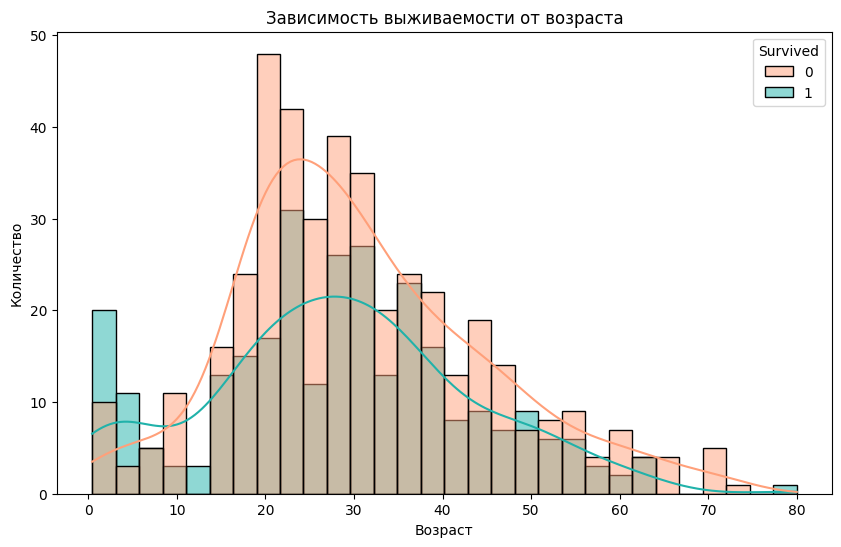

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x="Age", hue="Survived", bins=30, kde=True,
             palette=["#ffa07a", "#20b2aa"])
plt.title("Зависимость выживаемости от возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()


Вывод: Можно заметить, что маленькие дети выживали чаще, но в группах взрослых чёткой зависимости почти не наблюдается

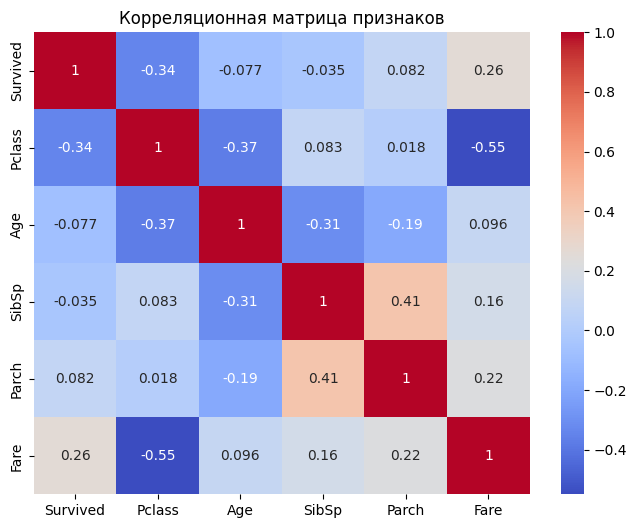

In [14]:
corr_matrix = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()


### Вывод:

Класс билета наиболее заметно связан с вероятностью выживания: чем выше класс, тем больше шансов

Цена билета (Fare) связана с классом билета (дороже в 1-м классе)

Возраст практически не влияет на общий шанс выжить, хотя у самых молодых детей картина отличается